# Project 1. 중고차 시세 예측
**과목명:  응용데이터애널리틱스 (Applied Data Analytics)** \\
**학수번호:  INE4108** \\
**교강사:  송재욱 교수 (산업공학과)** \\
 \\
***

## P1-1. Environmental Set-up & Data Loading

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)




Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# 한글 나눔포트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 모델 수립을 위한 Train/Validation Set
df = pd.read_csv('/content/drive/MyDrive/P1_dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('/content/drive/MyDrive/P1_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## P1-2. Modelling
- df를 사용하여 예측모형 수립
- 상세 사항은 업로드 된 비디오 참고

In [ ]:
df.columns

Index(['GOODNO', 'SUCCYMD', 'CARNM', 'CHASNO', 'CARREGIYMD', 'YEAR', 'MISSNM',
       'FUELNM', 'COLOR', 'EXHA',
       ...
       'SUNLOOPPANORAMA', 'SUNLOOPCOMMON', 'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1',
       'ETC', 'AV', 'EPS', 'ECS'],
      dtype='object', length=104)

In [ ]:
df_test.columns

Index(['GOODNO', 'SUCCYMD', 'CARNM', 'CHASNO', 'CARREGIYMD', 'YEAR', 'MISSNM',
       'FUELNM', 'COLOR', 'EXHA',
       ...
       'SUNLOOPPANORAMA', 'SUNLOOPCOMMON', 'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1',
       'ETC', 'AV', 'EPS', 'ECS'],
      dtype='object', length=104)

In [ ]:
nan_counts = df.isna().sum()

# NaN이 하나라도 있는 컬럼만 보기
nan_counts = nan_counts[nan_counts > 0]

print(nan_counts)

CARREGIYMD           1
FUELNM               1
USEUSENM           323
OWNECLASNM          13
SHIPPING_PRICE    4325
NC_GRADE_PRICE    3781
dtype: int64


In [ ]:
nan_counts = df_test.isna().sum()

# NaN이 하나라도 있는 컬럼만 보기
nan_counts = nan_counts[nan_counts > 0]

print(nan_counts)

SHIPPING_PRICE    8
NC_GRADE_PRICE    1
dtype: int64


In [ ]:
df = df.dropna(subset=['CARREGIYMD'])
df['FUELNM'] = df['FUELNM'].fillna('가솔린')
df['USEUSENM'] = df['USEUSENM'].fillna('미상')
df['OWNECLASNM'] = df['OWNECLASNM'].fillna('개인')

In [ ]:
nan_counts = df.isna().sum()

# NaN이 하나라도 있는 컬럼만 보기
nan_counts = nan_counts[nan_counts > 0]

print(nan_counts)

SHIPPING_PRICE    4324
NC_GRADE_PRICE    3780
dtype: int64


In [ ]:
print(df.shape)

(36793, 104)


##['GOODNO', 'CHASNO', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY'] 변수 제거

In [ ]:
# 제거할 식별자 변수 리스트
cols_to_drop = ['GOODNO', 'CHASNO', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY']

# 전처리 적용
df = df.drop(columns=cols_to_drop)

In [ ]:
print(df.shape)

(36793, 97)


##['NOTAVAILABLE', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR'] 4가지 변수 확인

-> 데이터 그대로 사용

In [ ]:
columns_to_check = ['NOTAVAILABLE', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR']

for col in columns_to_check:
    print(f"[{col}] unique values:")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)


[NOTAVAILABLE] unique values:
NOTAVAILABLE
0    36793
Name: count, dtype: int64
----------------------------------------
[FLOODING] unique values:
FLOODING
0    34324
1     2469
Name: count, dtype: int64
----------------------------------------
[TOTAL_LOSS] unique values:
TOTAL_LOSS
0    36780
1       13
Name: count, dtype: int64
----------------------------------------
[JOINCAR] unique values:
JOINCAR
0    36793
Name: count, dtype: int64
----------------------------------------


##CARNM 차량명 확인 후 label encoding  

In [ ]:
df['CAR_NAME'] = df['CARNM'].astype(str).str.split().str[0]
df['CAR_NAME'].unique()

array(['모닝', 'K3', 'K5', 'K7', 'K9', 'Next_Innovation_K5', '더뉴K7', '더뉴모닝',
       '레이', '로체', '로체(이노베이션)', '리오SF', '포르테', '프라이드(JB)', '뉴쎄라토',
       '뉴오피러스', '오피러스', '스펙트라윙', '올뉴모닝', '올뉴프라이드(UB)', '쎄라토', '더뉴K5',
       '로체(어드밴스)', '리오', '제네시스', '스펙트라', '옵티마리갈', '옵티마', '더뉴K9', '비스토',
       '아반떼(HD)', 'ALL_NEW_K7', '그랜저XG', '더뉴프라이드', '그랜저(HG)', 'NEW그랜저XG',
       '더뉴K3', '카덴자', 'Smart_Compact_올뉴모닝', '스팅어', 'JEEP', '스파크', '더뉴레이',
       'The_New_K5', '더K9', '올뉴K3', '포텐샤', '그랜드카니발', '프런티어'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습
car_name_encoder = LabelEncoder()
car_name_encoder.fit(df['CAR_NAME'])

# 2. 매핑 딕셔너리 생성
car_name_map = dict(zip(
    car_name_encoder.classes_,
    car_name_encoder.transform(car_name_encoder.classes_)
))

# 3. df에 인코딩된 컬럼 생성
df['CAR_NAME_ENC'] = df['CAR_NAME'].map(car_name_map).astype(int)

print("✅ df['CAR_NAME'] 라벨 인코딩 완료")


✅ df['CAR_NAME'] 라벨 인코딩 완료


In [ ]:
print(df[['CAR_NAME', 'CAR_NAME_ENC']])

      CAR_NAME  CAR_NAME_ENC
0           모닝            29
1           K3             2
2           K3             2
3           K5             3
4           K5             3
...        ...           ...
36789     더뉴모닝            21
36790     더뉴K9            19
36791     더뉴K9            19
36792     더뉴K5            17
36793     더뉴K5            17

[36793 rows x 2 columns]


In [ ]:
df = df.drop(columns=['CAR_NAME', 'CARNM'])

In [ ]:
print(df.shape)

(36793, 97)


In [ ]:
'''# test에도 동일하게 적용 (unseen은 -1로 처리)
df_test['CAR_NAME_ENC'] = df_test['CAR_NAME'].map(car_name_map).fillna(-1).astype(int)
'''

"# test에도 동일하게 적용 (unseen은 -1로 처리)\ndf_test['CAR_NAME_ENC'] = df_test['CAR_NAME'].map(car_name_map).fillna(-1).astype(int)\n"

##교환 여부 통합해서 1개 변수로 저장

In [ ]:
# 1. 60개 변수 이름 리스트
damage_cols = [
    'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER',
    'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR',
    'TRUNK', 'FRONT_PANNEL', 'LEFT_STEP', 'RIGHT_STEP',
    'LEFT_FILER_A', 'RIGHT_FILER_A', 'LEFT_FILER_B', 'RIGHT_FILER_B',
    'LEFT_FILER_C', 'RIGHT_FILER_C', 'LEFT_REAR_FENDER', 'RIGHT_REAR_FENDER',
    'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL',
    'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE',
    'RIGHT_INSIDE_WHEEL_HOUSE', 'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE',
    'TRUNK_FLOOR', 'DASH_PANEL', 'SHEET_PANEL', 'SIDE_MEMBER_FRAME',
    'LEFT_QUARTER', 'RIGHT_QUARTER', 'FLOOR_PANEL', 'LEFT_SIDE_PANEL',
    'RIGHT_SIDE_PANEL', 'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL',
    'BACK_PANEL2', 'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL',
    'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL', 'SIDE_MEMBER_FRAME2',
    'LEFT_INSIDE_SHEETING', 'RIGHT_INSIDE_SHEETING',
    'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
    'LEFT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING',
    'LEFT_REAR_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING',
    'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING',
    'SHEET_BACK_PANEL_SHEETING', 'SIDE_MEMBER_FRAME_SHEETING',
    'FLOOR_PANEL_SHEETING', 'LEFT_SIDE_PANEL_SHEETING', 'RIGHT_SIDE_PANEL_SHEETING'
]

In [ ]:
df['DAMAGE_COUNT'] = df[damage_cols].fillna(0).sum(axis=1)


In [ ]:
print(df['DAMAGE_COUNT'])

0        0
1        0
2        0
3        0
4        6
        ..
36789    0
36790    3
36791    2
36792    3
36793    0
Name: DAMAGE_COUNT, Length: 36793, dtype: int64


In [ ]:
df = df.drop(columns=damage_cols)

In [ ]:
print(df.shape)

(36793, 38)


##OPTION 여부 통합해서 1개 변수로 저장

In [ ]:
option_cols = [
    'ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY',
    'SUNLOOPPANORAMA', 'SUNLOOPCOMMON', 'SUNLOOPDUAL',
    'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'
]

In [ ]:
# Train
df['OPTION_COUNT'] = df[option_cols].fillna(0).sum(axis=1)


In [ ]:
print(df['OPTION_COUNT'])

0        1
1        6
2        6
3        2
4        2
        ..
36789    3
36790    5
36791    6
36792    3
36793    3
Name: OPTION_COUNT, Length: 36793, dtype: int64


In [ ]:
df = df.drop(columns=option_cols)

In [ ]:
print(df.shape)

(36793, 24)


##COLOR 변수 전처리 후 라벨 인코딩 (색 종류)

In [ ]:
print(df['COLOR'].unique())

['C' 'A' 'B' 'D' 'F']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습
color_encoder = LabelEncoder()
color_encoder.fit(df['COLOR'])

# 2. 매핑 딕셔너리 생성
color_map = dict(zip(
    color_encoder.classes_,
    color_encoder.transform(color_encoder.classes_)
))

# 3. 인코딩된 컬럼 추가
df['COLOR_ENC'] = df['COLOR'].map(color_map).astype(int)

print("✅ df['COLOR'] 라벨 인코딩 완료")


✅ df['COLOR'] 라벨 인코딩 완료


In [ ]:
'''df_test['COLOR_ENC'] = df_test['COLOR'].map(color_map).fillna(-1).astype(int)
print("✅ df_test['COLOR'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'COLOR_ENC\'] = df_test[\'COLOR\'].map(color_map).fillna(-1).astype(int)\nprint("✅ df_test[\'COLOR\'] 인코딩 완료 (unseen → -1)")\n'

In [ ]:
print(df[['COLOR', 'COLOR_ENC']])

      COLOR  COLOR_ENC
0         C          2
1         A          0
2         A          0
3         B          1
4         D          3
...     ...        ...
36789     A          0
36790     D          3
36791     B          1
36792     A          0
36793     A          0

[36793 rows x 2 columns]


In [ ]:
df = df.drop(columns=['COLOR'])
print(len(df.columns))

24


##MISSNM 미션명 (변속기) 종류 전처리 후 LABEL ENCODING

In [ ]:
missnm_unique = df['MISSNM'].unique()

print(" df['MISSNM'] 고유값:")
print(missnm_unique)


 df['MISSNM'] 고유값:
['A/T' 'CVT' 'M/T']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습
mission_encoder = LabelEncoder()
mission_encoder.fit(df['MISSNM'])

# 2. 매핑 딕셔너리 생성
mission_map = dict(zip(
    mission_encoder.classes_,
    mission_encoder.transform(mission_encoder.classes_)
))

# 3. df에 인코딩된 컬럼 추가
df['MISSNM_ENC'] = df['MISSNM'].map(mission_map).astype(int)

print("✅ df['MISSNM'] 라벨 인코딩 완료")


✅ df['MISSNM'] 라벨 인코딩 완료


In [ ]:
'''df_test['MISSNM_ENC'] = df_test['MISSNM'].map(mission_map).fillna(-1).astype(int)
print("✅ df_test['MISSNM'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'MISSNM_ENC\'] = df_test[\'MISSNM\'].map(mission_map).fillna(-1).astype(int)\nprint("✅ df_test[\'MISSNM\'] 인코딩 완료 (unseen → -1)")\n'

In [ ]:
print(df[['MISSNM', 'MISSNM_ENC']].head())

  MISSNM  MISSNM_ENC
0    A/T           0
1    A/T           0
2    A/T           0
3    A/T           0
4    A/T           0


In [ ]:
print(df[['MISSNM', 'MISSNM_ENC']].drop_duplicates().sort_values('MISSNM_ENC'))

   MISSNM  MISSNM_ENC
0     A/T           0
20    CVT           1
39    M/T           2


In [ ]:
df = df.drop(columns=['MISSNM'], errors='ignore')
print("🧹 'MISSNM' 원본 컬럼 삭제 완료")
print(len(df.columns))

🧹 'MISSNM' 원본 컬럼 삭제 완료
24


##USEUSENM (용도명) 전처리 후 라벨 인코딩

In [ ]:
print("🚗 df['USEUSENM'] 고유값:")
print(df['USEUSENM'].unique())

🚗 df['USEUSENM'] 고유값:
['자가' '렌트' '업무' '리스' '사업' '미상']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습
useuse_encoder = LabelEncoder()
useuse_encoder.fit(df['USEUSENM'])

# 2. 매핑 딕셔너리 생성
useusenm_map = dict(zip(
    useuse_encoder.classes_,
    useuse_encoder.transform(useuse_encoder.classes_)
))

# 3. 인코딩 적용
df['USEUSENM_ENC'] = df['USEUSENM'].map(useusenm_map).astype(int)

print("✅ df['USEUSENM'] 라벨 인코딩 완료")


✅ df['USEUSENM'] 라벨 인코딩 완료


In [ ]:
'''df_test['USEUSENM_ENC'] = df_test['USEUSENM'].map(useusenm_map).fillna(-1).astype(int)
print("✅ df_test['USEUSENM'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'USEUSENM_ENC\'] = df_test[\'USEUSENM\'].map(useusenm_map).fillna(-1).astype(int)\nprint("✅ df_test[\'USEUSENM\'] 인코딩 완료 (unseen → -1)")\n'

In [ ]:
print(df[['USEUSENM', 'USEUSENM_ENC']].head())

  USEUSENM  USEUSENM_ENC
0       자가             5
1       자가             5
2       자가             5
3       렌트             0
4       렌트             0


In [ ]:
print(df[['USEUSENM', 'USEUSENM_ENC']].drop_duplicates().sort_values('USEUSENM_ENC'))


     USEUSENM  USEUSENM_ENC
3          렌트             0
18         리스             1
1327       미상             2
184        사업             3
14         업무             4
0          자가             5


In [ ]:
df = df.drop(columns=['USEUSENM'], errors='ignore')
print(len(df.columns))


24


##OWNECLASNM  소유주 명 전처리 후 라벨 인코딩


In [ ]:
print("👤 df['OWNECLASNM'] 고유값:")
print(df['OWNECLASNM'].unique())

👤 df['OWNECLASNM'] 고유값:
['법인' '개인' '법인상품' '상품용' '재외국인' '개인사업' '종교단체']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습
owneclas_encoder = LabelEncoder()
owneclas_encoder.fit(df['OWNECLASNM'])

# 2. 매핑 딕셔너리 생성
owneclas_map = dict(zip(
    owneclas_encoder.classes_,
    owneclas_encoder.transform(owneclas_encoder.classes_)
))

# 3. 인코딩 적용
df['OWNECLASNM_ENC'] = df['OWNECLASNM'].map(owneclas_map).astype(int)

print(" df['OWNECLASNM'] 라벨 인코딩 완료")


 df['OWNECLASNM'] 라벨 인코딩 완료


In [ ]:
'''df_test['OWNECLASNM_ENC'] = df_test['OWNECLASNM'].map(owneclas_map).fillna(-1).astype(int)
print("✅ df_test['OWNECLASNM'] 인코딩 완료 (unseen → -1)")'''

'df_test[\'OWNECLASNM_ENC\'] = df_test[\'OWNECLASNM\'].map(owneclas_map).fillna(-1).astype(int)\nprint("✅ df_test[\'OWNECLASNM\'] 인코딩 완료 (unseen → -1)")'

In [ ]:
print(df[['OWNECLASNM', 'OWNECLASNM_ENC']].head(10))

  OWNECLASNM  OWNECLASNM_ENC
0         법인               2
1         법인               2
2         법인               2
3         법인               2
4         법인               2
5         법인               2
6         법인               2
7         개인               0
8         법인               2
9         법인               2


In [ ]:
print(df[['OWNECLASNM', 'OWNECLASNM_ENC']].drop_duplicates().sort_values('OWNECLASNM_ENC'))


      OWNECLASNM  OWNECLASNM_ENC
7             개인               0
3437        개인사업               1
0             법인               2
13          법인상품               3
39           상품용               4
1905        재외국인               5
25782       종교단체               6


In [ ]:
df = df.drop(columns=['OWNECLASNM'], errors='ignore')
print(len(df.columns))


24


##FUELNM (연료명) 전처리 후 라벨 인코딩

-> 초기 nan 값은 가장 흔한 값인 '가솔린'으로 채워넣음.

-> 이미 코드초반에 진행함

In [ ]:
print("⛽️ df['FUELNM'] 고유값:")
print(df['FUELNM'].unique())

⛽️ df['FUELNM'] 고유값:
['LPG' '가솔린' 'Hybrid' '디젤' '겸용' '전기']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습
fuel_encoder = LabelEncoder()
fuel_encoder.fit(df['FUELNM'])

# 2. 매핑 딕셔너리 생성
fuel_map = dict(zip(
    fuel_encoder.classes_,
    fuel_encoder.transform(fuel_encoder.classes_)
))

# 3. 인코딩 적용
df['FUELNM_ENC'] = df['FUELNM'].map(fuel_map).astype(int)

print("✅ df['FUELNM'] 라벨 인코딩 완료")


✅ df['FUELNM'] 라벨 인코딩 완료


In [ ]:
'''df_test['FUELNM_ENC'] = df_test['FUELNM'].map(fuel_map).fillna(-1).astype(int)
print("✅ df_test['FUELNM'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'FUELNM_ENC\'] = df_test[\'FUELNM\'].map(fuel_map).fillna(-1).astype(int)\nprint("✅ df_test[\'FUELNM\'] 인코딩 완료 (unseen → -1)")\n'

In [ ]:
print(df[['FUELNM', 'FUELNM_ENC']].head())
print(df[['FUELNM', 'FUELNM_ENC']].drop_duplicates().sort_values('FUELNM_ENC'))


  FUELNM  FUELNM_ENC
0    LPG           1
1    가솔린           2
2    가솔린           2
3    LPG           1
4    LPG           1
     FUELNM  FUELNM_ENC
8    Hybrid           0
0       LPG           1
1       가솔린           2
19       겸용           3
15       디젤           4
165      전기           5


In [ ]:
# 1. 원본 컬럼 삭제
df = df.drop(columns=['FUELNM'], errors='ignore')
print("🧹 'FUELNM' 원본 컬럼 삭제 완료")

# 2. 컬럼 수 확인
print(f"📊 현재 df의 컬럼 수: {len(df.columns)}개")


🧹 'FUELNM' 원본 컬럼 삭제 완료
📊 현재 df의 컬럼 수: 24개


##YEARCHK (구식/신식) 구분 전처리

-> onehot이 아닌 label encoding으로 처리

In [ ]:
print("📅 df['YEARCHK'] 고유값:")
print(df['YEARCHK'].unique())

📅 df['YEARCHK'] 고유값:
['N' 'Y']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습 및 적용
yearchk_encoder = LabelEncoder()
yearchk_encoder.fit(df['YEARCHK'])

# 매핑 딕셔너리 생성
yearchk_map = dict(zip(
    yearchk_encoder.classes_,
    yearchk_encoder.transform(yearchk_encoder.classes_)
))

# 인코딩 적용
df['YEARCHK_ENC'] = df['YEARCHK'].map(yearchk_map).astype(int)
print("✅ df['YEARCHK'] 라벨 인코딩 완료")

# 2. 매핑 관계 확인
print("\n📋 YEARCHK 인코딩 매핑:")
print(df[['YEARCHK', 'YEARCHK_ENC']].drop_duplicates().sort_values('YEARCHK_ENC'))

# 3. 원본 컬럼 제거
df = df.drop(columns=['YEARCHK'], errors='ignore')
print("\n🧹 'YEARCHK' 원본 컬럼 삭제 완료")

# 4. 컬럼 수 확인
print(f"📊 현재 df의 컬럼 수: {len(df.columns)}개")


✅ df['YEARCHK'] 라벨 인코딩 완료

📋 YEARCHK 인코딩 매핑:
  YEARCHK  YEARCHK_ENC
0       N            0
1       Y            1

🧹 'YEARCHK' 원본 컬럼 삭제 완료
📊 현재 df의 컬럼 수: 24개


In [ ]:
'''df_test['YEARCHK_ENC'] = df_test['YEARCHK'].map(yearchk_map).fillna(-1).astype(int)
print("✅ df_test['YEARCHK'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'YEARCHK_ENC\'] = df_test[\'YEARCHK\'].map(yearchk_map).fillna(-1).astype(int)\nprint("✅ df_test[\'YEARCHK\'] 인코딩 완료 (unseen → -1)")\n'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. 고유값 확인
print("🔍 df['INNEEXPOCLASCD_YN'] 고유값:")
print(sorted(df['INNEEXPOCLASCD_YN'].dropna().unique()))

# 2. LabelEncoder 학습 및 적용
yn_encoder = LabelEncoder()
yn_encoder.fit(df['INNEEXPOCLASCD_YN'])

# 3. 매핑 딕셔너리 생성
yn_map = dict(zip(
    yn_encoder.classes_,
    yn_encoder.transform(yn_encoder.classes_)
))

# 4. 인코딩 적용
df['INNEEXPOCLASCD_YN_ENC'] = df['INNEEXPOCLASCD_YN'].map(yn_map).astype(int)
print("\n✅ df['INNEEXPOCLASCD_YN'] 라벨 인코딩 완료")

# 5. 매핑 확인
print("\n📋 인코딩 매핑 확인:")
print(df[['INNEEXPOCLASCD_YN', 'INNEEXPOCLASCD_YN_ENC']].drop_duplicates().sort_values('INNEEXPOCLASCD_YN_ENC'))

# 6. 원본 컬럼 삭제
df = df.drop(columns=['INNEEXPOCLASCD_YN'], errors='ignore')
print("\n🧹 'INNEEXPOCLASCD_YN' 원본 컬럼 삭제 완료")

# 7. 컬럼 수 확인
print(f"📊 현재 df의 컬럼 수: {len(df.columns)}개")


🔍 df['INNEEXPOCLASCD_YN'] 고유값:
['O', 'X']

✅ df['INNEEXPOCLASCD_YN'] 라벨 인코딩 완료

📋 인코딩 매핑 확인:
  INNEEXPOCLASCD_YN  INNEEXPOCLASCD_YN_ENC
6                 O                      0
0                 X                      1

🧹 'INNEEXPOCLASCD_YN' 원본 컬럼 삭제 완료
📊 현재 df의 컬럼 수: 24개


In [ ]:
'''df_test['INNEEXPOCLASCD_YN_ENC'] = df_test['INNEEXPOCLASCD_YN'].map(yn_map).fillna(-1).astype(int)
print("✅ df_test['INNEEXPOCLASCD_YN'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'INNEEXPOCLASCD_YN_ENC\'] = df_test[\'INNEEXPOCLASCD_YN\'].map(yn_map).fillna(-1).astype(int)\nprint("✅ df_test[\'INNEEXPOCLASCD_YN\'] 인코딩 완료 (unseen → -1)")\n'

##EXHA 배기량 변수 이상치 처리 및 중앙값 저장

##배기량에 따른 차종 구분

경차	700 ~ 1100

소형/준중형	1101 ~ 1600

중형	1601 ~ 2200

대형	2201 ~ 3000

고성능차/수입차	3001 ~5000 (드묾)

이상치 5000초과 및 700미만

In [ ]:
print(" df['EXHA'] 고유값:")
print(sorted(df['EXHA'].dropna().unique()))

 df['EXHA'] 고유값:
[np.int64(0), np.int64(1), np.int64(50), np.int64(199), np.int64(796), np.int64(798), np.int64(800), np.int64(995), np.int64(997), np.int64(998), np.int64(999), np.int64(1000), np.int64(1300), np.int64(1343), np.int64(1395), np.int64(1396), np.int64(1399), np.int64(1400), np.int64(1492), np.int64(1493), np.int64(1495), np.int64(1500), np.int64(1580), np.int64(1582), np.int64(1590), np.int64(1591), np.int64(1594), np.int64(1596), np.int64(1598), np.int64(1599), np.int64(1600), np.int64(1685), np.int64(1700), np.int64(1795), np.int64(1798), np.int64(1800), np.int64(1836), np.int64(1975), np.int64(1991), np.int64(1995), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2199), np.int64(2200), np.int64(2349), np.int64(2359), np.int64(2395), np.int64(2399), np.int64(2400), np.int64(2650), np.int64(2651), np.int64(2656), np.int64(2696), np.int64(2700), np.int64(2902), np.int64(2957), np.int64(2972), np.int64(2997), np.int64(2999), np.int64(3000), np.int

In [ ]:
exha = df['EXHA']

# 각 구간별 개수
light = ((exha >= 700) & (exha <= 1100)).sum()
compact = ((exha >= 1101) & (exha <= 1600)).sum()
midsize = ((exha >= 1601) & (exha <= 2200)).sum()
fullsize = ((exha >= 2201) & (exha <= 3000)).sum()
highperf = ((exha >= 3001) & (exha <= 5000)).sum()
outlier = ((exha > 5000) | (exha < 700)).sum()

# 출력
print(f"\n🚘 df - EXHA 분포 (최종 기준)")
print(f" - 경차 (700~1100): {light}")
print(f" - 소형/준중형 (1101~1600): {compact}")
print(f" - 중형 (1601~2200): {midsize}")
print(f" - 대형 (2201~3000): {fullsize}")
print(f" - 고성능/수입차 (3001~5000): {highperf}")
print(f" - ❗ 이상치 (<700 or >5000): {outlier}")



🚘 df - EXHA 분포 (최종 기준)
 - 경차 (700~1100): 12121
 - 소형/준중형 (1101~1600): 6301
 - 중형 (1601~2200): 10557
 - 대형 (2201~3000): 5525
 - 고성능/수입차 (3001~5000): 2209
 - ❗ 이상치 (<700 or >5000): 80


In [ ]:
import numpy as np

# 1. 이상치를 NaN으로 처리
df['EXHA'] = df['EXHA'].where((df['EXHA'] >= 700) & (df['EXHA'] <= 5000), other=np.nan)

# 2. 중앙값 계산
exha_median = df['EXHA'].median()

# 3. NaN을 중앙값으로 대체
df['EXHA'] = df['EXHA'].fillna(exha_median)

print(f"✅ df['EXHA']: 이상치 → NaN → 중앙값({exha_median:.2f})으로 대체 완료")

✅ df['EXHA']: 이상치 → NaN → 중앙값(1600.00)으로 대체 완료


In [ ]:
exha_median = df['EXHA'].median()

In [ ]:
'''# 예시: test셋에 같은 기준 적용
df_test['EXHA'] = df_test['EXHA'].where((df_test['EXHA'] >= 700) & (df_test['EXHA'] <= 5000), other=np.nan)
df_test['EXHA'] = df_test['EXHA'].fillna(median)

print(f"✅ df_test['EXHA']: '''

'# 예시: test셋에 같은 기준 적용\ndf_test[\'EXHA\'] = df_test[\'EXHA\'].where((df_test[\'EXHA\'] >= 700) & (df_test[\'EXHA\'] <= 5000), other=np.nan)\ndf_test[\'EXHA\'] = df_test[\'EXHA\'].fillna(median)\n\nprint(f"✅ df_test[\'EXHA\']: '

In [ ]:
len(df.columns)

24

##TRAVDIST 주행 거리로부터 파생변수 생성


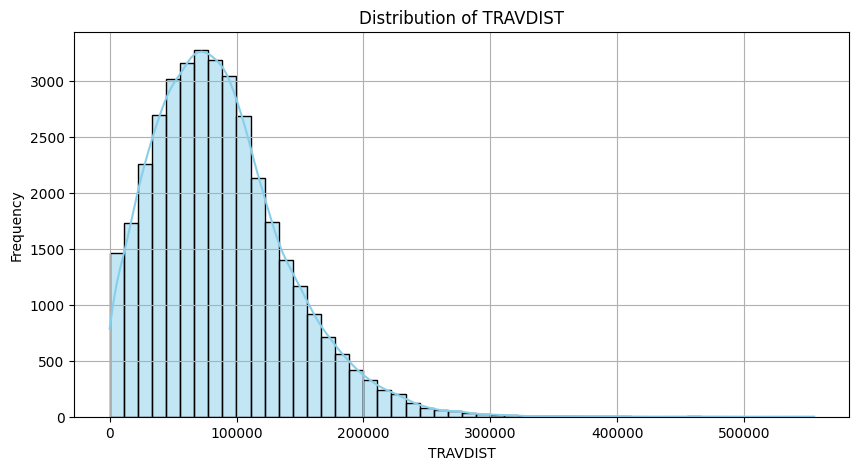

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['TRAVDIST'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of TRAVDIST')
plt.xlabel('TRAVDIST')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# 1. 로그 변환 (log1p = log(1 + x))
df['TRAVDIST_LOG'] = np.log1p(df['TRAVDIST'])

print("✅ df['TRAVDIST'] → df['TRAVDIST_LOG'] (log1p) 변환 완료")


✅ df['TRAVDIST'] → df['TRAVDIST_LOG'] (log1p) 변환 완료


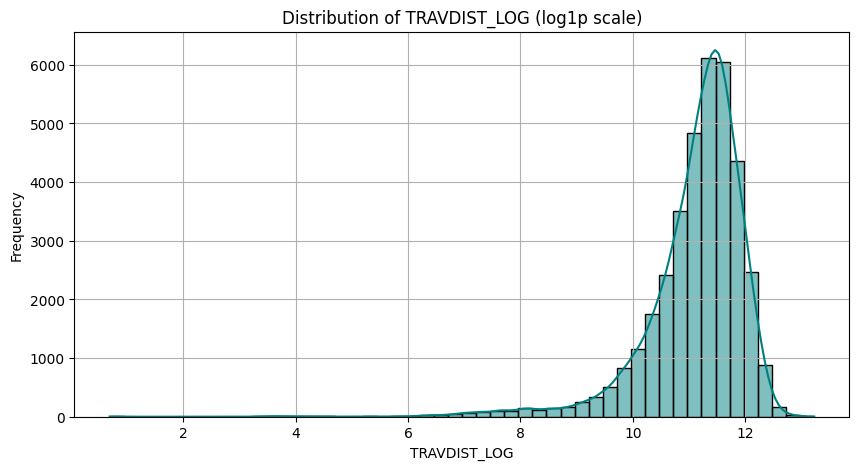

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['TRAVDIST_LOG'], bins=50, kde=True, color='teal')
plt.title('Distribution of TRAVDIST_LOG (log1p scale)')
plt.xlabel('TRAVDIST_LOG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [ ]:
# 왜도 계산
original_skew = df['TRAVDIST'].skew()
log_skew = df['TRAVDIST_LOG'].skew()

# 결과 출력
print("📊 df - Skewness 비교")
print(f" - TRAVDIST        : {original_skew:.4f}")
print(f" - TRAVDIST_LOG    : {log_skew:.4f} ✅ {'(개선됨)' if abs(log_skew) < abs(original_skew) else '(로그변환 무의미)'}")

📊 df - Skewness 비교
 - TRAVDIST        : 0.9345
 - TRAVDIST_LOG    : -2.3562 ✅ (로그변환 무의미)


로그 변환을 해도 Skewness가 좋아지지 않아 로그 변환 안 하고 이상치 제거하는 방식 선택

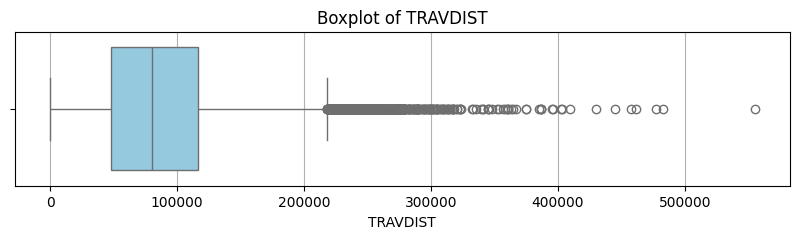

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TRAVDIST'], color='skyblue')
plt.title('Boxplot of TRAVDIST')
plt.xlabel('TRAVDIST')
plt.grid(True, axis='x')
plt.show()



##상위 0.1% 이상치 제거 후 nan 처리 -> median으로 대체

In [ ]:
import numpy as np

# 1. 상위 0.1% 기준값 계산
threshold = df['TRAVDIST'].quantile(0.999)

# 2. 이상치 → NaN 처리
df['TRAVDIST'] = df['TRAVDIST'].where(df['TRAVDIST'] <= threshold, np.nan)

# 3. 중앙값 계산
median_tra = df['TRAVDIST'].median()

# 4. NaN → 중앙값으로 대체
df['TRAVDIST'] = df['TRAVDIST'].fillna(median_tra)

print(f"✅ df['TRAVDIST']: 상위 0.1% 이상치 제거 후 중앙값({median_tra:.0f})으로 대체 완료")


✅ df['TRAVDIST']: 상위 0.1% 이상치 제거 후 중앙값(80270)으로 대체 완료


In [ ]:
median_tra

80270.5

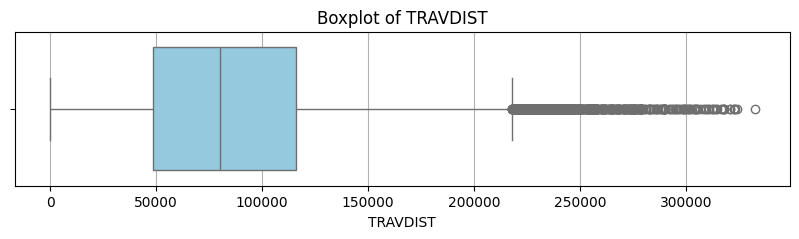

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TRAVDIST'], color='skyblue')
plt.title('Boxplot of TRAVDIST')
plt.xlabel('TRAVDIST')
plt.grid(True, axis='x')
plt.show()

In [ ]:
'''# df_test에 동일한 기준 적용
df_test['TRAVDIST'] = df_test['TRAVDIST'].where(df_test['TRAVDIST'] <= threshold, np.nan)
df_test['TRAVDIST'] = df_test['TRAVDIST'].fillna(median_tra)

print(f"✅ df_test['TRAVDIST']: 동일 기준 적용 (NaN → 중앙값 {median_tra:.0f}으로 대체)")
'''

'# df_test에 동일한 기준 적용\ndf_test[\'TRAVDIST\'] = df_test[\'TRAVDIST\'].where(df_test[\'TRAVDIST\'] <= threshold, np.nan)\ndf_test[\'TRAVDIST\'] = df_test[\'TRAVDIST\'].fillna(median_tra)\n\nprint(f"✅ df_test[\'TRAVDIST\']: 동일 기준 적용 (NaN → 중앙값 {median_tra:.0f}으로 대체)")\n'

In [ ]:
# TRAVDIST_LOG 컬럼 삭제
if 'TRAVDIST_LOG' in df.columns:
    df = df.drop(columns=['TRAVDIST_LOG'])
    print("🧹 df: 'TRAVDIST_LOG' 컬럼 삭제 완료")
else:
    print("✅ df: 'TRAVDIST_LOG' 컬럼 없음 (이미 삭제됨)")


🧹 df: 'TRAVDIST_LOG' 컬럼 삭제 완료


In [ ]:
len(df.columns)

24

##연간 주행거리 계산

In [ ]:
# 1. 연도 추출
df['SUCCYEAR'] = df['SUCCYMD'].astype(str).str[:4].astype(int)
df['CARREGIYEAR'] = df['CARREGIYMD'].astype(str).str[:4].astype(int)

# 2. 차령 계산 (최소 1년)
df['CAR_AGE'] = (df['SUCCYEAR'] - df['CARREGIYEAR']).clip(lower=1)

# 3. 연간 주행거리
df['ANNUAL_TRAVDIST'] = df['TRAVDIST'] / df['CAR_AGE']

print("✅ df: SUCCYEAR, CARREGIYEAR, CAR_AGE, ANNUAL_TRAVDIST 생성 완료")


✅ df: SUCCYEAR, CARREGIYEAR, CAR_AGE, ANNUAL_TRAVDIST 생성 완료


In [ ]:
# 1. 연도 추출
df['SUCCYEAR'] = df['SUCCYMD'].astype(str).str[:4].astype(int)
df['CARREGIYEAR'] = df['CARREGIYMD'].astype(str).str[:4].astype(int)

# 2. 차령 계산 (최소 1년)
df['CAR_AGE'] = (df['SUCCYEAR'] - df['CARREGIYEAR']).clip(lower=1)

# 3. 연간 주행거리
df['ANNUAL_TRAVDIST'] = df['TRAVDIST'] / df['CAR_AGE']

print("✅ df: SUCCYEAR, CARREGIYEAR, CAR_AGE, ANNUAL_TRAVDIST 생성 완료")


✅ df: SUCCYEAR, CARREGIYEAR, CAR_AGE, ANNUAL_TRAVDIST 생성 완료


In [ ]:
cols_to_drop = ['SUCCYEAR', 'CARREGIYEAR', 'CAR_AGE']

df = df.drop(columns=cols_to_drop, errors='ignore')
print("🧹 df: SUCCYEAR, CARREGIYEAR, CAR_AGE 컬럼 삭제 완료")


🧹 df: SUCCYEAR, CARREGIYEAR, CAR_AGE 컬럼 삭제 완료


In [ ]:
len(df.columns)

25

In [ ]:
df.columns

Index(['SUCCYMD', 'CARREGIYMD', 'YEAR', 'EXHA', 'TRAVDIST', 'NEWCARPRIC',
       'SUCCPRIC', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
       'NC_GRADE_KEY', 'SHIPPING_PRICE', 'NC_GRADE_PRICE', 'CAR_NAME_ENC',
       'DAMAGE_COUNT', 'OPTION_COUNT', 'COLOR_ENC', 'MISSNM_ENC',
       'USEUSENM_ENC', 'OWNECLASNM_ENC', 'FUELNM_ENC', 'YEARCHK_ENC',
       'INNEEXPOCLASCD_YN_ENC', 'ANNUAL_TRAVDIST'],
      dtype='object')

##SEASON 변수 생성

→ 낙찰일자에서 1-3월(Q1), 4-6월(Q2), 7-9월(Q3), 10-12월(Q4) 4개의 기간 구분

→ 연초(Q1)는 비수기라 가격 낮을 가능성 존재

→ 여름방학 및 휴가철(Q3)는 성수기라 가격 높을 가능성 존재

→ 연말(Q4)는 연식이 바뀌기 직전이라 할인이 많을 가능성 존재

- 차량이 언제 낙찰되었는지에 따라 가격이 달라질 수 있기에 중요한 변수


In [ ]:
# 분기 추출 함수
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# 문자열에서 월 추출 후 → 분기로 매핑
df['AUCTION_QUARTER'] = df['SUCCYMD'].astype(str).str[4:6].astype(int).map(get_quarter)

print("✅ df: AUCTION_QUARTER 컬럼 생성 완료")


✅ df: AUCTION_QUARTER 컬럼 생성 완료


In [ ]:
print("📘 df - AUCTION_QUARTER 확인:")
print(df[['AUCTION_QUARTER', 'SUCCYMD']].head())

📘 df - AUCTION_QUARTER 확인:
  AUCTION_QUARTER   SUCCYMD
0              Q1  20160105
1              Q1  20160105
2              Q1  20160105
3              Q1  20160105
4              Q1  20160105


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. LabelEncoder 학습 (전체 df 기준)
quarter_encoder = LabelEncoder()
quarter_encoder.fit(df['AUCTION_QUARTER'])

# 2. 매핑 딕셔너리 생성
quarter_map = dict(zip(
    quarter_encoder.classes_,
    quarter_encoder.transform(quarter_encoder.classes_)
))

# 3. 인코딩 적용
df['AUCTION_QUARTER_ENC'] = df['AUCTION_QUARTER'].map(quarter_map).astype(int)

print(f"✅ df['AUCTION_QUARTER'] 라벨 인코딩 완료 (클래스 수: {len(quarter_map)})")


✅ df['AUCTION_QUARTER'] 라벨 인코딩 완료 (클래스 수: 4)


In [ ]:
'''df_test['AUCTION_QUARTER_ENC'] = df_test['AUCTION_QUARTER'].map(quarter_map).fillna(-1).astype(int)
print("✅ df_test['AUCTION_QUARTER'] 인코딩 완료 (unseen → -1)")
'''

'df_test[\'AUCTION_QUARTER_ENC\'] = df_test[\'AUCTION_QUARTER\'].map(quarter_map).fillna(-1).astype(int)\nprint("✅ df_test[\'AUCTION_QUARTER\'] 인코딩 완료 (unseen → -1)")\n'

In [ ]:
print("📘 df - AUCTION_QUARTER 인코딩 확인:")
print(df[['AUCTION_QUARTER', 'AUCTION_QUARTER_ENC']].head())
print("📋 AUCTION_QUARTER ↔ AUCTION_QUARTER_ENC 매핑 (중복 제거):")
print(df[['AUCTION_QUARTER', 'AUCTION_QUARTER_ENC']].drop_duplicates().sort_values('AUCTION_QUARTER_ENC'))

📘 df - AUCTION_QUARTER 인코딩 확인:
  AUCTION_QUARTER  AUCTION_QUARTER_ENC
0              Q1                    0
1              Q1                    0
2              Q1                    0
3              Q1                    0
4              Q1                    0
📋 AUCTION_QUARTER ↔ AUCTION_QUARTER_ENC 매핑 (중복 제거):
     AUCTION_QUARTER  AUCTION_QUARTER_ENC
0                 Q1                    0
2510              Q2                    1
5319              Q3                    2
7739              Q4                    3


In [ ]:
df = df.drop(columns=['AUCTION_QUARTER'], errors='ignore')
print("🧹 df: 'AUCTION_QUARTER' 컬럼 삭제 완료")

🧹 df: 'AUCTION_QUARTER' 컬럼 삭제 완료


In [ ]:
df.columns

Index(['SUCCYMD', 'CARREGIYMD', 'YEAR', 'EXHA', 'TRAVDIST', 'NEWCARPRIC',
       'SUCCPRIC', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
       'NC_GRADE_KEY', 'SHIPPING_PRICE', 'NC_GRADE_PRICE', 'CAR_NAME_ENC',
       'DAMAGE_COUNT', 'OPTION_COUNT', 'COLOR_ENC', 'MISSNM_ENC',
       'USEUSENM_ENC', 'OWNECLASNM_ENC', 'FUELNM_ENC', 'YEARCHK_ENC',
       'INNEEXPOCLASCD_YN_ENC', 'ANNUAL_TRAVDIST', 'AUCTION_QUARTER_ENC'],
      dtype='object')

##사용 일수 파생 변수 생성

In [ ]:
# 1. 날짜 형식 변환
df['SUCCYMD'] = pd.to_datetime(df['SUCCYMD'], format='%Y%m%d')
df['CARREGIYMD'] = pd.to_datetime(df['CARREGIYMD'], format='%Y%m%d')

# 2. 사용일수 계산
df['USED_DAYS'] = (df['SUCCYMD'] - df['CARREGIYMD']).dt.days

print("📆 df: 'USED_DAYS' 컬럼 생성 완료")

📆 df: 'USED_DAYS' 컬럼 생성 완료


In [ ]:
df['USED_DAYS']

,USED_DAYS
0,2029
1,1062
2,707
3,1113
4,1713
...,...
36789,1557
36790,1617
36791,1478
36792,1770


In [ ]:
df.columns

Index(['SUCCYMD', 'CARREGIYMD', 'YEAR', 'EXHA', 'TRAVDIST', 'NEWCARPRIC',
       'SUCCPRIC', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
       'NC_GRADE_KEY', 'SHIPPING_PRICE', 'NC_GRADE_PRICE', 'CAR_NAME_ENC',
       'DAMAGE_COUNT', 'OPTION_COUNT', 'COLOR_ENC', 'MISSNM_ENC',
       'USEUSENM_ENC', 'OWNECLASNM_ENC', 'FUELNM_ENC', 'YEARCHK_ENC',
       'INNEEXPOCLASCD_YN_ENC', 'ANNUAL_TRAVDIST', 'AUCTION_QUARTER_ENC',
       'USED_DAYS'],
      dtype='object')

In [ ]:
df = df.drop(columns=['SUCCYMD','CARREGIYMD', 'YEAR'])

In [ ]:
len(df.columns)

24

##FINAL_PRICE 변수 생성

## **FINAL_PRICE 이상치 범위 설정 시나리오**

## **1. 상한값 확인**
1) 상한값 설정 불필요\
데이터에서 1억 원 초과 값이 존재하지 않음으로, 상한값을 설정할 필요가 없음\
→ 최대값은 94,100,000원으로 확인

2) 상한값 설정\
1억 원 초과 값은 존재하지 않으므로 상한값을 따로 설정하지 않고 이상치 처리에서 제외


## **2. 하한값 설정을 위한 4가지 방법**
하한값을 설정하기 위해 4가지 방법을 사용하여 하한값을 측정

> 1) Box Plot 기준\
Q1 (1사분위수): 13,250,000원\
Q3 (3사분위수): 27,090,000원\
IQR (Interquartile Range): 13,840,000원\
하한 (Lower Bound): -7,510,000원 (음수로 나왔으므로 올바르지 않음)\
상한 (Upper Bound): 47,850,000원\
너무 작은 값 개수: 0개 (음수 값이 없으므로 제외)\
너무 큰 값 개수: 1,639개 (상한을 초과한 값)

결론: 하한값이 음수로 나온 결과로, 이 방법은 사용하지 않음

> 2) Z-score 기준\
평균 (mean): 21,575,719원\
표준편차 (std): 12,173,458원\
하한 = mean - 3 × std = 21,575,719 - 3 × 12,173,458 = -14,944,654원\
상한 (Upper Bound):
상한 = mean + 3 × std = 21,575,719 + 3 × 12,173,458 = 58,096,093원\
너무 작은 값 개수: 0개\
너무 큰 값 개수: 873개

결론: 하한값이 음수로 나왔으므로, 이 방법도 적합하지 않음


> 3) Modified Z-score 기준\
중앙값 (median): 17,120,000원\
MAD (Mean Absolute Deviation): 4,980,000원\
Modified Z-score = 0.6745 × (filtered value - median) / MAD\
하한 = median - (3.5 × MAD / 0.6745)
     = 17,120,000 - (3.5 × 4,980,000 / 0.6745)
     = -8,721,364원\
상한 = median + (3.5 × MAD / 0.6745)
     = 17,120,000 + (3.5 × 4,980,000 / 0.6745)
     = 42,961,364원\
너무 작은 값 개수: 0개\
너무 큰 값 개수: 1,932개

결론: 하한값이 음수로 나왔으므로, 이 방법도 적합하지 않음

> 4) 하위 1% 기준\
하위 1% 기준값 (Percentile 1): 8,910,000원\
하위 1% 미만 값 개수: 348개\
하위 1% 미만인 348개의 데이터는 이상치로 처리하고 제외

결론: 하위 1% 기준으로 하한값 8,910,000원을 설정하여 이상치 제거

## **최종 결론**

1) 0과 1은 명백한 이상치\
→
FINAL_PRICE가 0이나 1인 값은 비현실적인 가격으로 간주되어 이상치로 처리하고 제외

2) 1억 원 초과 값은 존재하지 않음\
→
데이터에서 1억 원을 초과하는 가격은 존재하지 않으므로 상한값 설정은 불필요

3) 가격 분포\
→
전체 가격 분포의 대부분은 1천만 원~2천만 원 구간에 집중되어 있으며, 낮은 가격대의 이상치를 제거하는 것이 중요

4) 하한값 설정\
→
하한값은 다양한 방법으로 설정할 수 있습니다.\
Box Plot, Z-score, Modified Z-score, 하위 1% 절단법을 통해 하한값을 설정했으며, 그 중 하위 1% 기준으로 8,910,000원을 하한값으로 설정하고 이상치를 제외

5) 하한값 설정 방법\
→
Box Plot과 Z-score, Modified Z-score 방법은 모두 음수값을 도출해 부적합한 하한값으로 처리\
하위 1% 절단법을 사용하여 하한값을 8,910,000원으로 설정하고, 그 이하의 값을 이상치로 판단하여 제외

6) 이상치 처리 결과\
→
전체 36,795개 행 중 1,038개 행이 이상치로 제외\
최종적으로 35,757개의 유효한 데이터가 남음

In [ ]:
# 가격 우선순위에 따라 FINAL_PRICE 생성: SHIPPING_PRICE > NC_GRADE_PRICE > NEWCARPRIC
df['FINAL_PRICE'] = df['SHIPPING_PRICE']
df['FINAL_PRICE'] = df['FINAL_PRICE'].fillna(df['NC_GRADE_PRICE'])
df['FINAL_PRICE'] = df['FINAL_PRICE'].fillna(df['NEWCARPRIC'])

# 3개 모두 NaN인 행 제거
## 데이터 확인 결과, 본 코드는 사실상 해당 없음 ('NEWCARPRIC'에 NaN 없음)
df = df[df['FINAL_PRICE'].notna()].reset_index(drop=True)

# 이상치 → NaN 처리 (891만원 미만)
df['FINAL_PRICE'] = df['FINAL_PRICE'].where(df['FINAL_PRICE'] >= 8_910_000, np.nan)

# 중앙값 계산
final_price_median = df['FINAL_PRICE'].median()

# NaN → 중앙값 대체
df['FINAL_PRICE'] = df['FINAL_PRICE'].fillna(final_price_median)

print(f"이상치(891만원 미만) → NaN → 중앙값({final_price_median:,.0f})으로 대체 완료")


이상치(891만원 미만) → NaN → 중앙값(17,130,000)으로 대체 완료


In [ ]:
df = df.drop(columns=['SHIPPING_PRICE','NC_GRADE_PRICE', 'NEWCARPRIC'])

In [ ]:
len(df.columns)

22

In [ ]:
df=df.drop(columns=['NC_GRADE_KEY'])

In [ ]:
len(df.columns)

21

In [ ]:
df

,EXHA,TRAVDIST,SUCCPRIC,FLOODING,TOTAL_LOSS,JOINCAR,NOTAVAILABLE,CAR_NAME_ENC,DAMAGE_COUNT,OPTION_COUNT,...,MISSNM_ENC,USEUSENM_ENC,OWNECLASNM_ENC,FUELNM_ENC,YEARCHK_ENC,INNEEXPOCLASCD_YN_ENC,ANNUAL_TRAVDIST,AUCTION_QUARTER_ENC,USED_DAYS,FINAL_PRICE
0,1000.0,38480.0,4300000,0,0,0,0,29,0,1,...,0,5,2,1,0,1,6413.333333,0,2029,11310000.0
1,1600.0,62240.0,11650000,0,0,0,0,2,0,6,...,0,5,2,2,1,1,20746.666667,0,1062,19750000.0
2,1591.0,37926.0,12350000,0,0,0,0,2,0,6,...,0,5,2,2,1,1,18963.000000,0,707,19340000.0
3,2000.0,110149.0,5900000,0,0,0,0,3,0,2,...,0,0,2,1,0,1,27537.250000,0,1113,17680000.0
4,2000.0,81675.0,4730000,0,0,0,0,3,6,2,...,0,0,2,1,1,1,16335.000000,0,1713,15800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36788,998.0,62180.0,5910000,0,0,0,0,21,0,3,...,0,5,3,2,0,1,15545.000000,1,1557,12500000.0
36789,3778.0,97801.0,19200000,0,0,0,0,19,3,5,...,0,5,3,2,0,1,19560.200000,1,1617,56800000.0
36790,3342.0,153601.0,18200000,0,0,0,0,19,2,6,...,0,0,3,2,1,1,38400.250000,1,1478,49089202.0
36791,1999.0,140058.0,5800000,0,0,0,0,17,3,3,...,0,0,3,1,0,1,28011.600000,1,1770,17130000.0


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/P1_team3_real.csv', index=False)

## P1-3. System Implementation
- df_test에 기반하여 실제 사용을 위한 system implemetation 작업 진행

##df 전처리한 순서대로 그대로 전처리

-> label encoding은 df에 fit한대로

In [ ]:
len(df_test.columns)
print(df_test.shape)

(20, 104)


In [ ]:
nan_counts = df_test.isna().sum()

# NaN이 하나라도 있는 컬럼만 보기
nan_counts = nan_counts[nan_counts > 0]

print(nan_counts)

SHIPPING_PRICE    8
NC_GRADE_PRICE    1
dtype: int64


In [ ]:
# 제거할 식별자 변수 리스트
cols_to_drop = ['GOODNO', 'CHASNO', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY']

# 전처리 적용
df_test = df_test.drop(columns=cols_to_drop)
print(df_test.shape)

(20, 97)


In [ ]:
columns_to_check = ['NOTAVAILABLE', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR']

for col in columns_to_check:
    print(f"[{col}] unique values:")
    print(df_test[col].value_counts(dropna=False))
    print("-" * 40)


[NOTAVAILABLE] unique values:
NOTAVAILABLE
0    20
Name: count, dtype: int64
----------------------------------------
[FLOODING] unique values:
FLOODING
0    20
Name: count, dtype: int64
----------------------------------------
[TOTAL_LOSS] unique values:
TOTAL_LOSS
0    20
Name: count, dtype: int64
----------------------------------------
[JOINCAR] unique values:
JOINCAR
0    20
Name: count, dtype: int64
----------------------------------------


CAR_NAME_ENC 변수 생성

In [ ]:
df_test['CAR_NAME'] = df_test['CARNM'].astype(str).str.split().str[0]
df_test['CAR_NAME'].unique()
# test에도 동일하게 적용 (unseen은 -1로 처리)
df_test['CAR_NAME_ENC'] = df_test['CAR_NAME'].map(car_name_map).fillna(-1).astype(int)


In [ ]:
print(df_test[['CAR_NAME', 'CAR_NAME_ENC']])

              CAR_NAME  CAR_NAME_ENC
0                 더뉴K5            17
1                 더뉴K5            17
2                 더뉴K5            17
3                 더뉴K3            16
4                 더뉴K9            19
5   Next_Innovation_K5             7
6                 더뉴K3            16
7   Next_Innovation_K5             7
8                   레이            23
9   Next_Innovation_K5             7
10                  레이            23
11                  레이            23
12                  레이            23
13                  레이            23
14                  레이            23
15                  레이            23
16                  레이            23
17                  레이            23
18                더뉴K5            17
19                  모닝            29


In [ ]:
df_test = df_test.drop(columns=['CAR_NAME', 'CARNM'])
len(df_test.columns)

97

DAMAGE_COUNT 파생변수 생성

In [ ]:
# 1. 60개 변수 이름 리스트
damage_cols = [
    'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER',
    'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR',
    'TRUNK', 'FRONT_PANNEL', 'LEFT_STEP', 'RIGHT_STEP',
    'LEFT_FILER_A', 'RIGHT_FILER_A', 'LEFT_FILER_B', 'RIGHT_FILER_B',
    'LEFT_FILER_C', 'RIGHT_FILER_C', 'LEFT_REAR_FENDER', 'RIGHT_REAR_FENDER',
    'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL',
    'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE',
    'RIGHT_INSIDE_WHEEL_HOUSE', 'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE',
    'TRUNK_FLOOR', 'DASH_PANEL', 'SHEET_PANEL', 'SIDE_MEMBER_FRAME',
    'LEFT_QUARTER', 'RIGHT_QUARTER', 'FLOOR_PANEL', 'LEFT_SIDE_PANEL',
    'RIGHT_SIDE_PANEL', 'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL',
    'BACK_PANEL2', 'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL',
    'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL', 'SIDE_MEMBER_FRAME2',
    'LEFT_INSIDE_SHEETING', 'RIGHT_INSIDE_SHEETING',
    'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
    'LEFT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING',
    'LEFT_REAR_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING',
    'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING',
    'SHEET_BACK_PANEL_SHEETING', 'SIDE_MEMBER_FRAME_SHEETING',
    'FLOOR_PANEL_SHEETING', 'LEFT_SIDE_PANEL_SHEETING', 'RIGHT_SIDE_PANEL_SHEETING'
]

In [ ]:
df_test['DAMAGE_COUNT'] = df_test[damage_cols].fillna(0).sum(axis=1)
print(df_test['DAMAGE_COUNT'])
df_test = df_test.drop(columns=damage_cols)
print(df_test.shape)

0      0
1      0
2      6
3      4
4      0
5      0
6      0
7      1
8     10
9      0
10     5
11     1
12     0
13     0
14     1
15     4
16     1
17     5
18     9
19     4
Name: DAMAGE_COUNT, dtype: int64
(20, 38)


OPTION_COUNT 파생 변수 생성

In [ ]:
option_cols = [
    'ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY',
    'SUNLOOPPANORAMA', 'SUNLOOPCOMMON', 'SUNLOOPDUAL',
    'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'
]

In [ ]:
# Train
df_test['OPTION_COUNT'] = df_test[option_cols].fillna(0).sum(axis=1)
print(df_test['OPTION_COUNT'])
df_test = df_test.drop(columns=option_cols)
print(df_test.shape)

0     3
1     3
2     3
3     6
4     6
5     4
6     3
7     5
8     3
9     4
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    4
18    4
19    1
Name: OPTION_COUNT, dtype: int64
(20, 24)


COLOR 변수 라벨 인코딩

In [ ]:
print(df_test['COLOR'])
df_test['COLOR_ENC'] = df_test['COLOR'].map(color_map).fillna(-1).astype(int)
print("df_test['COLOR'] 인코딩 완료 (unseen → -1)")

0     A
1     A
2     A
3     A
4     B
5     C
6     C
7     B
8     D
9     C
10    D
11    D
12    D
13    D
14    D
15    D
16    D
17    A
18    B
19    C
Name: COLOR, dtype: object
df_test['COLOR'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['COLOR', 'COLOR_ENC']])
df_test = df_test.drop(columns=['COLOR'])
print(len(df_test.columns))

   COLOR  COLOR_ENC
0      A          0
1      A          0
2      A          0
3      A          0
4      B          1
5      C          2
6      C          2
7      B          1
8      D          3
9      C          2
10     D          3
11     D          3
12     D          3
13     D          3
14     D          3
15     D          3
16     D          3
17     A          0
18     B          1
19     C          2
24


MISSNM 라벨 인코딩

In [ ]:
df_test['MISSNM']
df_test['MISSNM_ENC'] = df_test['MISSNM'].map(mission_map).fillna(-1).astype(int)
print("✅ df_test['MISSNM'] 인코딩 완료 (unseen → -1)")


✅ df_test['MISSNM'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['MISSNM', 'MISSNM_ENC']])
df_test = df_test.drop(columns=['MISSNM'])
print(len(df_test.columns))

   MISSNM  MISSNM_ENC
0     A/T           0
1     A/T           0
2     A/T           0
3     A/T           0
4     A/T           0
5     A/T           0
6     A/T           0
7     A/T           0
8     A/T           0
9     A/T           0
10    A/T           0
11    A/T           0
12    A/T           0
13    A/T           0
14    A/T           0
15    A/T           0
16    A/T           0
17    A/T           0
18    A/T           0
19    A/T           0
24


USEUSENM  라벨 인코딩

In [ ]:
df_test['USEUSENM']
df_test['USEUSENM_ENC'] = df_test['USEUSENM'].map(useusenm_map).fillna(-1).astype(int)
print("✅ df_test['USEUSENM'] 인코딩 완료 (unseen → -1)")


✅ df_test['USEUSENM'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['USEUSENM', 'USEUSENM_ENC']])
df_test = df_test.drop(columns=['USEUSENM'])
print(len(df_test.columns))

   USEUSENM  USEUSENM_ENC
0        렌트             0
1        렌트             0
2        렌트             0
3        자가             5
4        업무             4
5        렌트             0
6        렌트             0
7        렌트             0
8        리스             1
9        렌트             0
10       리스             1
11       리스             1
12       리스             1
13       리스             1
14       리스             1
15       리스             1
16       업무             4
17       자가             5
18       렌트             0
19       자가             5
24


OWNECLASNM  라벨 인코딩

In [ ]:
df_test['OWNECLASNM']
df_test['OWNECLASNM_ENC'] = df_test['OWNECLASNM'].map(owneclas_map).fillna(-1).astype(int)
print("✅ df_test['OWNECLASNM'] 인코딩 완료 (unseen → -1)")

✅ df_test['OWNECLASNM'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['OWNECLASNM', 'OWNECLASNM_ENC']])
df_test = df_test.drop(columns=['OWNECLASNM'])
print(len(df_test.columns))

   OWNECLASNM  OWNECLASNM_ENC
0        법인상품               3
1        법인상품               3
2        법인상품               3
3        법인상품               3
4        법인상품               3
5        법인상품               3
6        법인상품               3
7        법인상품               3
8        법인상품               3
9        법인상품               3
10       법인상품               3
11       법인상품               3
12       법인상품               3
13       법인상품               3
14       법인상품               3
15       법인상품               3
16       법인상품               3
17       법인상품               3
18       법인상품               3
19       법인상품               3
24


FUELNM  라벨 인코딩

In [ ]:
df_test['FUELNM']
df_test['FUELNM_ENC'] = df_test['FUELNM'].map(fuel_map).fillna(-1).astype(int)
print("✅ df_test['FUELNM'] 인코딩 완료 (unseen → -1)")

✅ df_test['FUELNM'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['FUELNM', 'FUELNM_ENC']].head())
df_test = df_test.drop(columns=['FUELNM'], errors='ignore')


# 2. 컬럼 수 확인
print(len(df_test.columns))


  FUELNM  FUELNM_ENC
0    LPG           1
1    LPG           1
2    LPG           1
3    가솔린           2
4    가솔린           2
24


YEARCHK (구식/신식) 구분 전처리
-> onehot이 아닌 label encoding으로 처리

In [ ]:
df_test['YEARCHK_ENC'] = df_test['YEARCHK'].map(yearchk_map).fillna(-1).astype(int)
print("✅ df_test['YEARCHK'] 인코딩 완료 (unseen → -1)")


✅ df_test['YEARCHK'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['YEARCHK', 'YEARCHK_ENC']].head())
df_test = df_test.drop(columns=['YEARCHK'], errors='ignore')


# 2. 컬럼 수 확인
print(len(df_test.columns))

  YEARCHK  YEARCHK_ENC
0       N            0
1       N            0
2       N            0
3       Y            1
4       N            0
24


INNEEXPOCLASCD_YN  라벨 인코딩

In [ ]:
df_test['INNEEXPOCLASCD_YN_ENC'] = df_test['INNEEXPOCLASCD_YN'].map(yn_map).fillna(-1).astype(int)
print("✅ df_test['INNEEXPOCLASCD_YN'] 인코딩 완료 (unseen → -1)")

✅ df_test['INNEEXPOCLASCD_YN'] 인코딩 완료 (unseen → -1)


In [ ]:
print(df_test[['INNEEXPOCLASCD_YN', 'INNEEXPOCLASCD_YN_ENC']].head())
df_test = df_test.drop(columns=['INNEEXPOCLASCD_YN'], errors='ignore')


# 2. 컬럼 수 확인
print(len(df_test.columns))

  INNEEXPOCLASCD_YN  INNEEXPOCLASCD_YN_ENC
0                 X                      1
1                 X                      1
2                 X                      1
3                 X                      1
4                 X                      1
24


##상기 df와 같은 방식으로 구분 후 label encoding

EXHA 배기량 변수 이상치 처리 및 중앙값 저장

경차 700 ~ 1100

소형/준중형 1101 ~ 1600

중형 1601 ~ 2200

대형 2201 ~ 3000

고성능차/수입차 3001 ~5000 (드묾)

이상치 5000초과 및 700미만

In [ ]:
exha = df_test['EXHA']

# 각 구간별 개수
light = ((exha >= 700) & (exha <= 1100)).sum()
compact = ((exha >= 1101) & (exha <= 1600)).sum()
midsize = ((exha >= 1601) & (exha <= 2200)).sum()
fullsize = ((exha >= 2201) & (exha <= 3000)).sum()
highperf = ((exha >= 3001) & (exha <= 5000)).sum()
outlier = ((exha > 5000) | (exha < 700)).sum()

# 출력
print(f"\n🚘 df - EXHA 분포 (최종 기준)")
print(f" - 경차 (700~1100): {light}")
print(f" - 소형/준중형 (1101~1600): {compact}")
print(f" - 중형 (1601~2200): {midsize}")
print(f" - 대형 (2201~3000): {fullsize}")
print(f" - 고성능/수입차 (3001~5000): {highperf}")
print(f" - ❗ 이상치 (<700 or >5000): {outlier}")



🚘 df - EXHA 분포 (최종 기준)
 - 경차 (700~1100): 10
 - 소형/준중형 (1101~1600): 2
 - 중형 (1601~2200): 7
 - 대형 (2201~3000): 0
 - 고성능/수입차 (3001~5000): 1
 - ❗ 이상치 (<700 or >5000): 0


이상치가 없으므로 그대로 진행

In [ ]:
len(df_test.columns)

24

##TRAVDIST 주행 거리로부터 파생변수 생성

In [ ]:
df_test['TRAVDIST']

,TRAVDIST
0,155933
1,152960
2,161471
3,35382
4,46965
5,28046
6,85104
7,102099
8,37303
9,25483


NaN 값이 없으므로 그대로 진행


##연간 주행거리 계산하는 파생변수 생성

In [ ]:
# 1. 연도 추출
df_test['SUCCYEAR'] = df_test['SUCCYMD'].astype(str).str[:4].astype(int)
df_test['CARREGIYEAR'] = df_test['CARREGIYMD'].astype(str).str[:4].astype(int)

# 2. 차령 계산 (최소 1년)
df_test['CAR_AGE'] = (df_test['SUCCYEAR'] - df_test['CARREGIYEAR']).clip(lower=1)

# 3. 연간 주행거리 계산
df_test['ANNUAL_TRAVDIST'] = df_test['TRAVDIST'] / df_test['CAR_AGE']

print("✅ df_test: SUCCYEAR, CARREGIYEAR, CAR_AGE, ANNUAL_TRAVDIST 생성 완료")


✅ df_test: SUCCYEAR, CARREGIYEAR, CAR_AGE, ANNUAL_TRAVDIST 생성 완료


In [ ]:
cols_to_drop = ['SUCCYEAR', 'CARREGIYEAR', 'CAR_AGE']

df_test = df_test.drop(columns=cols_to_drop, errors='ignore')
print("🧹 df: SUCCYEAR, CARREGIYEAR, CAR_AGE 컬럼 삭제 완료")


🧹 df: SUCCYEAR, CARREGIYEAR, CAR_AGE 컬럼 삭제 완료


In [ ]:
len(df_test.columns)

25

##분기 생성 후 라벨 인코딩

In [ ]:
# 분기 추출 함수
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# 문자열에서 월 추출 후 → 분기로 매핑
df_test['AUCTION_QUARTER'] = df_test['SUCCYMD'].astype(str).str[4:6].astype(int).map(get_quarter)

print("✅ df_test: AUCTION_QUARTER 컬럼 생성 완료")


✅ df_test: AUCTION_QUARTER 컬럼 생성 완료


In [ ]:
print("📘 df_test - AUCTION_QUARTER 확인:")
print(df_test[['AUCTION_QUARTER', 'SUCCYMD']])

📘 df_test - AUCTION_QUARTER 확인:
   AUCTION_QUARTER   SUCCYMD
0               Q2  20190523
1               Q2  20190523
2               Q2  20190523
3               Q2  20190523
4               Q2  20190523
5               Q2  20190523
6               Q2  20190523
7               Q2  20190523
8               Q2  20190523
9               Q2  20190523
10              Q2  20190523
11              Q2  20190523
12              Q2  20190523
13              Q2  20190523
14              Q2  20190523
15              Q2  20190523
16              Q2  20190523
17              Q2  20190523
18              Q2  20190523
19              Q2  20190523


In [ ]:
df_test['AUCTION_QUARTER_ENC'] = df_test['AUCTION_QUARTER'].map(quarter_map).fillna(-1).astype(int)
print("✅ df_test['AUCTION_QUARTER'] 인코딩 완료 (unseen → -1)")


✅ df_test['AUCTION_QUARTER'] 인코딩 완료 (unseen → -1)


In [ ]:
df_test = df_test.drop(columns=['AUCTION_QUARTER'], errors='ignore')
print("🧹 df_test: 'AUCTION_QUARTER' 컬럼 삭제 완료")

🧹 df_test: 'AUCTION_QUARTER' 컬럼 삭제 완료


In [ ]:
len(df_test.columns)

26

##사용 일수 파생변수 생성

In [ ]:
# 1. 날짜 형식 변환
df_test['SUCCYMD'] = pd.to_datetime(df_test['SUCCYMD'], format='%Y%m%d')
df_test['CARREGIYMD'] = pd.to_datetime(df_test['CARREGIYMD'], format='%Y%m%d')

# 2. 사용일수 계산
df_test['USED_DAYS'] = (df_test['SUCCYMD'] - df_test['CARREGIYMD']).dt.days

print("📆 df_test: 'USED_DAYS' 컬럼 생성 완료")


📆 df_test: 'USED_DAYS' 컬럼 생성 완료


In [ ]:
df_test = df_test.drop(columns=['SUCCYMD','CARREGIYMD', 'YEAR'])

In [ ]:
len(df_test.columns)

24

##FINAL_PRICE 변수 생성

In [ ]:
df_test['FINAL_PRICE'] = df_test['SHIPPING_PRICE']
df_test['FINAL_PRICE'] = df_test['FINAL_PRICE'].fillna(df_test['NC_GRADE_PRICE'])
df_test['FINAL_PRICE'] = df_test['FINAL_PRICE'].fillna(df_test['NEWCARPRIC'])

# 학습셋에서 계산한 중앙값 사용
df_test['FINAL_PRICE'] = df_test['FINAL_PRICE'].apply(
    lambda x: final_price_median if x < 8_910_000 else x
)

print("✅ df_test: FINAL_PRICE가 891만원 미만인 값 → 중앙값으로 대체 완료")
df_test['FINAL_PRICE']

✅ df_test: FINAL_PRICE가 891만원 미만인 값 → 중앙값으로 대체 완료


,FINAL_PRICE
0,17130000.0
1,17130000.0
2,17130000.0
3,24050000.0
4,58670000.0
5,19460000.0
6,16050000.0
7,26130000.0
8,11890000.0
9,19460000.0


In [ ]:
df_test.columns

Index(['EXHA', 'TRAVDIST', 'NEWCARPRIC', 'SUCCPRIC', 'FLOODING', 'TOTAL_LOSS',
       'JOINCAR', 'NOTAVAILABLE', 'NC_GRADE_KEY', 'SHIPPING_PRICE',
       'NC_GRADE_PRICE', 'CAR_NAME_ENC', 'DAMAGE_COUNT', 'OPTION_COUNT',
       'COLOR_ENC', 'MISSNM_ENC', 'USEUSENM_ENC', 'OWNECLASNM_ENC',
       'FUELNM_ENC', 'YEARCHK_ENC', 'INNEEXPOCLASCD_YN_ENC', 'ANNUAL_TRAVDIST',
       'AUCTION_QUARTER_ENC', 'USED_DAYS', 'FINAL_PRICE'],
      dtype='object')

In [ ]:
df_test = df_test.drop(columns=['SHIPPING_PRICE','NC_GRADE_PRICE', 'NEWCARPRIC', 'NC_GRADE_KEY'])

In [ ]:
len(df_test.columns)

21

In [ ]:
df_test

,EXHA,TRAVDIST,SUCCPRIC,FLOODING,TOTAL_LOSS,JOINCAR,NOTAVAILABLE,CAR_NAME_ENC,DAMAGE_COUNT,OPTION_COUNT,...,MISSNM_ENC,USEUSENM_ENC,OWNECLASNM_ENC,FUELNM_ENC,YEARCHK_ENC,INNEEXPOCLASCD_YN_ENC,ANNUAL_TRAVDIST,AUCTION_QUARTER_ENC,USED_DAYS,FINAL_PRICE
0,1999,155933,5600000,0,0,0,0,17,0,3,...,0,0,3,1,0,1,31186.600000,1,1820,17130000.0
1,1999,152960,5700000,0,0,0,0,17,0,3,...,0,0,3,1,0,1,30592.000000,1,1820,17130000.0
2,1999,161471,5700000,0,0,0,0,17,6,3,...,0,0,3,1,0,1,32294.200000,1,1820,17130000.0
3,1591,35382,13100000,0,0,0,0,16,4,6,...,0,5,3,2,1,1,11794.000000,1,1189,24050000.0
4,3342,46965,25800000,0,0,0,0,19,0,6,...,0,4,3,2,0,1,9393.000000,1,1644,58670000.0
5,1999,28046,12850000,0,0,0,0,7,0,4,...,0,0,3,1,1,1,9348.666667,1,1092,19460000.0
6,1591,85104,8100000,0,0,0,0,16,0,3,...,0,0,3,2,1,1,28368.000000,1,1102,16050000.0
7,1999,102099,12100000,0,0,0,0,7,1,5,...,0,0,3,1,1,1,34033.000000,1,1127,26130000.0
8,998,37303,3300000,0,0,0,0,23,10,3,...,0,1,3,2,1,1,7460.600000,1,1911,11890000.0
9,1999,25483,12700000,0,0,0,0,7,0,4,...,0,0,3,1,1,1,8494.333333,1,1092,19460000.0


In [ ]:
df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/P1_team3_test_real.csv', index=False)

**저장해놓은 전처리한 데이터셋과 TEST 데이터셋 불러오기**

In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P1_team3_real.csv', encoding ='cp949')

In [ ]:
df_test_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P1_team3_test_real.csv', encoding ='cp949')

Randomseed 아무거나 5개로 설정 후 train, valid 사이 평균 값 구하기

In [ ]:
from sklearn.model_selection import train_test_split
import random

X = df_full.drop(columns=['SUCCPRIC'])
y = df_full['SUCCPRIC']

seeds = [101, 202, 303, 404, 505]  # 예시 시드 5개
splits = []  # 결과 저장

for seed in seeds:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    splits.append({
        'seed': seed,
        'X_train': X_train,
        'X_valid': X_valid,
        'y_train': y_train,
        'y_valid': y_valid
    })


test data에 대해 모델 진행

##ADABOOST 진행

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# 하이퍼파라미터 고정
n_estimators = 130
learning_rate = 0.1
max_depth = 10

# 결과 저장 리스트
train_mses = []
valid_mses = []
valid_mapes = []

for split in splits:
    X_train = split['X_train']
    y_train = split['y_train']
    X_valid = split['X_valid']
    y_valid = split['y_valid']

    model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=max_depth),
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    valid_mape = mean_absolute_percentage_error(y_valid, y_valid_pred) * 100  # %

    train_mses.append(train_mse)
    valid_mses.append(valid_mse)
    valid_mapes.append(valid_mape)

# 결과 테이블
mape_df = pd.DataFrame({
    'Seed': [s['seed'] for s in splits],
    'Train MSE': train_mses,
    'Valid MSE': valid_mses,
    'Valid MAPE (%)': valid_mapes
})

# 평균값
avg_train_mse = np.mean(train_mses)
avg_valid_mse = np.mean(valid_mses)
avg_valid_mape = np.mean(valid_mapes)

best_ADABOOST_model = model

# 출력
print(mape_df)
print(f"\n▶ 평균 Train MSE: {avg_train_mse:.2f}")
print(f"▶ 평균 Valid MSE: {avg_valid_mse:.2f}")
print(f"▶ 평균 Valid MAPE: {avg_valid_mape:.2f}%")

   Seed     Train MSE     Valid MSE  Valid MAPE (%)
0   101  5.116915e+11  9.732999e+11       10.538922
1   202  4.992836e+11  9.987109e+11       10.485088
2   303  4.968027e+11  1.036915e+12       12.427623
3   404  4.964748e+11  1.057465e+12       12.547614
4   505  5.030496e+11  9.570505e+11       11.081605

▶ 평균 Train MSE: 501460451480.84
▶ 평균 Valid MSE: 1004688295575.85
▶ 평균 Valid MAPE: 11.42%


TEST SET에 대해서도 진행

In [ ]:
# Feature / Target 분리
X_test = df_test.drop(columns=['SUCCPRIC'])
y_test = df_test['SUCCPRIC']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

y_test_pred = best_ADABOOST_model.predict(X_test)

# 중고차 시세 기준 지표
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"✅ Test MSE (중고차 시세): {mse:.2f}")
print(f"✅ Test MAE (중고차 시세): {mae:.2f}")
print(f"✅ Test MAPE (중고차 시세): {mape:.2f}%")

✅ Test MSE (중고차 시세): 1022938887148.88
✅ Test MAE (중고차 시세): 811087.80
✅ Test MAPE (중고차 시세): 12.59%


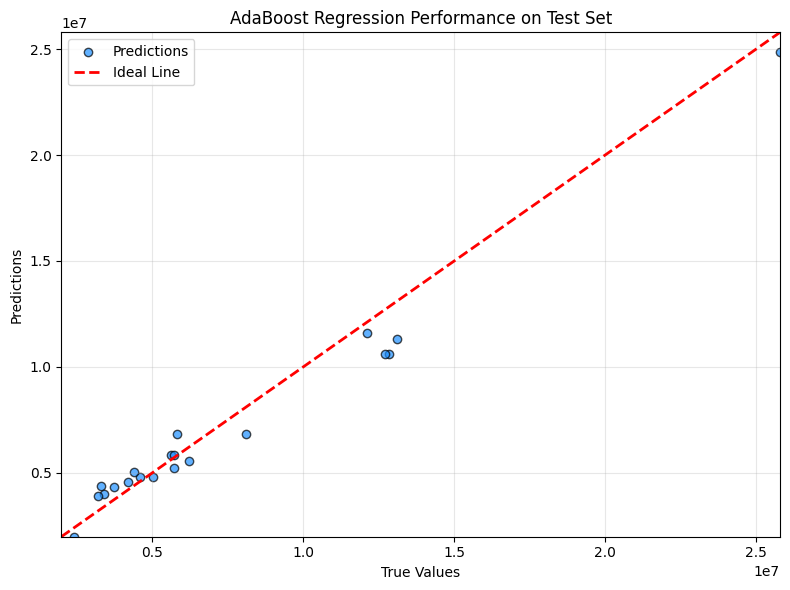

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_test_pred, c='dodgerblue', alpha=0.7, edgecolor='k', label='Predictions')

lims = [np.min([y_test.min(), y_test_pred.min()]), np.max([y_test.max(), y_test_pred.max()])]
ax.plot(lims, lims, 'r--', lw=2, label='Ideal Line')

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
ax.set_title('AdaBoost Regression Performance on Test Set')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##RANDOMFOREST 진행

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# 🎯 설정한 단일 하이퍼파라미터
n_estimators = 150
max_depth = 10
min_samples_split = 5

# 결과 저장 리스트
valid_mses = []
valid_mapes = []

# 마지막 모델 저장용
random_forest_model = None

# 5개 split에 대해 반복
for split in splits:
    X_train = split['X_train']
    y_train = split['y_train']
    X_valid = split['X_valid']
    y_valid = split['y_valid']

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    y_valid_pred = model.predict(X_valid)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    valid_mape = mean_absolute_percentage_error(y_valid, y_valid_pred) * 100

    valid_mses.append(valid_mse)
    valid_mapes.append(valid_mape)

    # 마지막 모델 저장
    random_forest_model = model

# 결과 테이블
mape_df = pd.DataFrame({
    'Seed': [s['seed'] for s in splits],
    'Train MSE': train_mses,
    'Valid MSE': valid_mses,
    'Valid MAPE (%)': valid_mapes
})



# 평균 결과 출력
avg_train_mse = np.mean(train_mses)
avg_valid_mse = np.mean(valid_mses)
avg_valid_mape = np.mean(valid_mapes)


print(mape_df)
print(f"\n▶ 평균 Train MSE: {avg_train_mse:.2f}")
print(f"✅ 평균 Valid MSE (RandomForest): {avg_valid_mse:.2f}")
print(f"✅ 평균 Valid MAPE (RandomForest): {avg_valid_mape:.2f}%")

   Seed     Train MSE     Valid MSE  Valid MAPE (%)
0   101  5.116915e+11  1.076974e+12       10.938143
1   202  4.992836e+11  1.122869e+12       10.912910
2   303  4.968027e+11  1.188919e+12       12.992526
3   404  4.964748e+11  1.181315e+12       13.048108
4   505  5.030496e+11  1.098009e+12       11.475160

▶ 평균 Train MSE: 501460451480.84
✅ 평균 Valid MSE (RandomForest): 1133617149330.80
✅ 평균 Valid MAPE (RandomForest): 11.87%


In [ ]:
# Feature / Target 분리
X_test = df_test.drop(columns=['SUCCPRIC'])
y_test = df_test['SUCCPRIC']

# 예측 수행
y_test_pred = random_forest_model.predict(X_test)

# 성능 지표 계산
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n📊 [RF] Test Set 성능")
print(f"✅ MSE  : {mse:.2f}")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ MAPE : {mape:.2f}%")


📊 [RF] Test Set 성능
✅ MSE  : 1575605575211.46
✅ MAE  : 958652.90
✅ MAPE : 14.17%


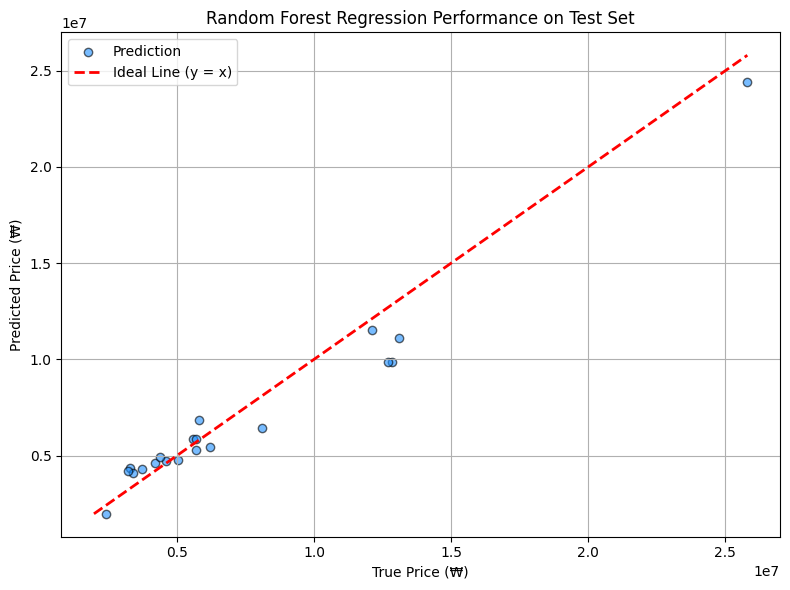

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, c='dodgerblue', alpha=0.6, edgecolor='k', label='Prediction')
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=2, label='Ideal Line (y = x)')

plt.xlabel("True Price (₩)")
plt.ylabel("Predicted Price (₩)")
plt.title("Random Forest Regression Performance on Test Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##LIGHTGBM 진행

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# 🎯 단일 하이퍼파라미터 설정
n_estimators = 150
max_depth = 10
learning_rate = 0.1

# 결과 저장 리스트
train_mses = []
valid_mses = []
valid_mapes = []

# 최종 모델 저장
lgbm_model = None

for split in splits:
    X_train = split['X_train']
    y_train = split['y_train']
    X_valid = split['X_valid']
    y_valid = split['y_valid']

    model = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    valid_mape = mean_absolute_percentage_error(y_valid, y_valid_pred) * 100

    train_mses.append(train_mse)
    valid_mses.append(valid_mse)
    valid_mapes.append(valid_mape)

    lgbm_model = model  # 마지막 모델 저장

# 📋 결과 테이블
mape_df = pd.DataFrame({
    'Seed': [s['seed'] for s in splits],
    'Train MSE': train_mses,
    'Valid MSE': valid_mses,
    'Valid MAPE (%)': valid_mapes
})

# 평균값 계산
avg_train_mse = np.mean(train_mses)
avg_valid_mse = np.mean(valid_mses)
avg_valid_mape = np.mean(valid_mapes)

# 📌 출력
print(mape_df)
print(f"\n▶ 평균 Train MSE : {avg_train_mse:.2f}")
print(f"▶ 평균 Valid MSE : {avg_valid_mse:.2f}")
print(f"▶ 평균 Valid MAPE: {avg_valid_mape:.2f}%")

   Seed     Train MSE     Valid MSE  Valid MAPE (%)
0   101  5.571358e+11  7.199594e+11        9.363708
1   202  5.477281e+11  7.338003e+11        9.182130
2   303  5.510093e+11  7.624074e+11       10.650787
3   404  5.480023e+11  7.449433e+11       10.918523
4   505  5.604986e+11  7.116264e+11        9.550685

▶ 평균 Train MSE : 552874813708.73
▶ 평균 Valid MSE : 734547367414.02
▶ 평균 Valid MAPE: 9.93%


In [ ]:
# Feature / Target 분리
X_test = df_test.drop(columns=['SUCCPRIC'])
y_test = df_test['SUCCPRIC']

# 예측 수행
y_test_pred = lgbm_model.predict(X_test)

# 성능 지표 계산
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n📊 [LGBM] Test Set 성능")
print(f"✅ MSE  : {mse:.2f}")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ MAPE : {mape:.2f}%")


📊 [LGBM] Test Set 성능
✅ MSE  : 1177773448912.02
✅ MAE  : 773343.04
✅ MAPE : 11.71%


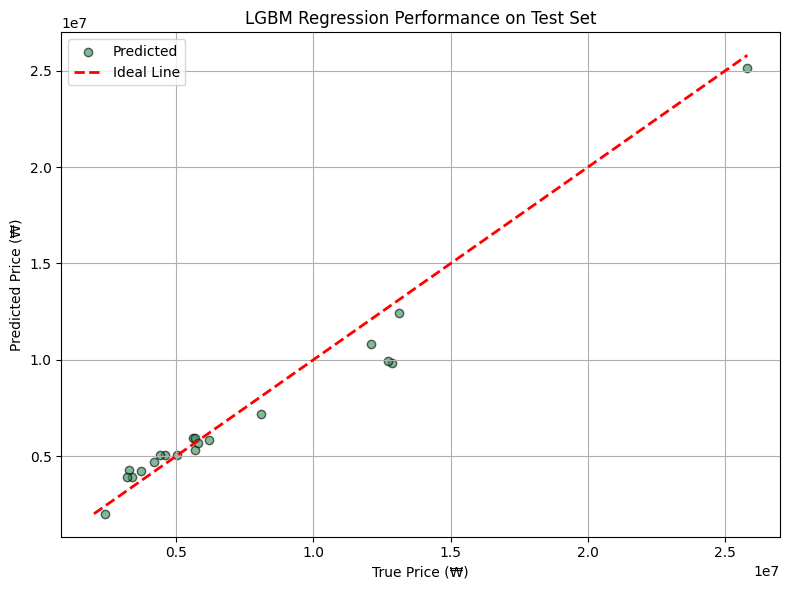

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, c='seagreen', alpha=0.6, edgecolor='k', label='Predicted')
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, 'r--', lw=2, label='Ideal Line')

plt.xlabel("True Price (₩)")
plt.ylabel("Predicted Price (₩)")
plt.title("LGBM Regression Performance on Test Set")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()